In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Get rid of warning
import warnings
warnings.simplefilter("ignore") 

## Task 2 Regression on Sydney Dataset

In [2]:
df = pd.read_csv("data/housedata/data.csv")

### 2.1 Determine which features are continuous vs categorical. Drop rows without a valid sales price.

Continuous features: sqft_living, sqft_lot, sqft_above, sqft_basement,  yr_built, yr_renovated

Categorical features: bedrooms, bathrooms, floors, waterfront, view, condition, street, city, statezip, country

Text(0.5, 0.06, 'Figure 1')

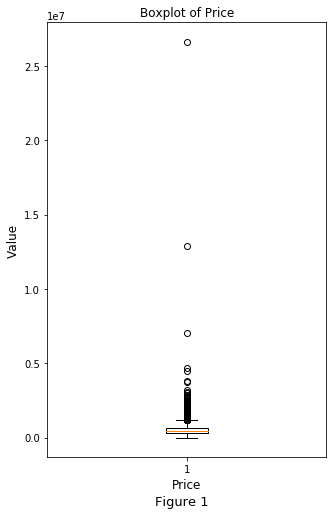

In [3]:
# Use boxplot to visualize price.
plt.figure(figsize = (5, 8))
plt.boxplot(df['price'])
plt.xlabel('Price', fontsize = 12)
plt.ylabel('Value', fontsize = 12)
plt.title('Boxplot of Price', fontsize = 12)

plt.suptitle(t = 'Figure 1', y = 0.06, fontsize = 13)

Figure 1 shows that variable 'price' is extremely right-skewed and there are a lot of outliers. But since we have no idea about whether or not they are valid, we can try keeping them or removing them and then compare the results. In addition, I think the house's price should be larger than 0, so we should drop the rows where price equals to 0.

In [4]:
# Drop rows with invalid sales price.
df = df[df['price'] > 0]

In [5]:
# Calculate the upper boundary of extreme ourliers.
outlier_upper_boundry = df['price'].quantile(0.75) + 3 * (df['price'].quantile(0.75) - df['price'].quantile(0.25))
# Drop extreme outliers.
df = df[df['price'] < outlier_upper_boundry]

We can drop the 'country' column, since the variable only has one value, which is 'USA'. We can also drop column 'street', because there are 4,525 unique values. If we do one-hot encoding on it, then we will have 4,525 more features, which should be avoided.

In [6]:
df = df.drop(['date', 'country', 'street'], axis = 1)

### 2.2 Visualize the univariate distribution of each continuous feature, and the distribution of the target. Do you notice anything? Is there something that might require special treatment?

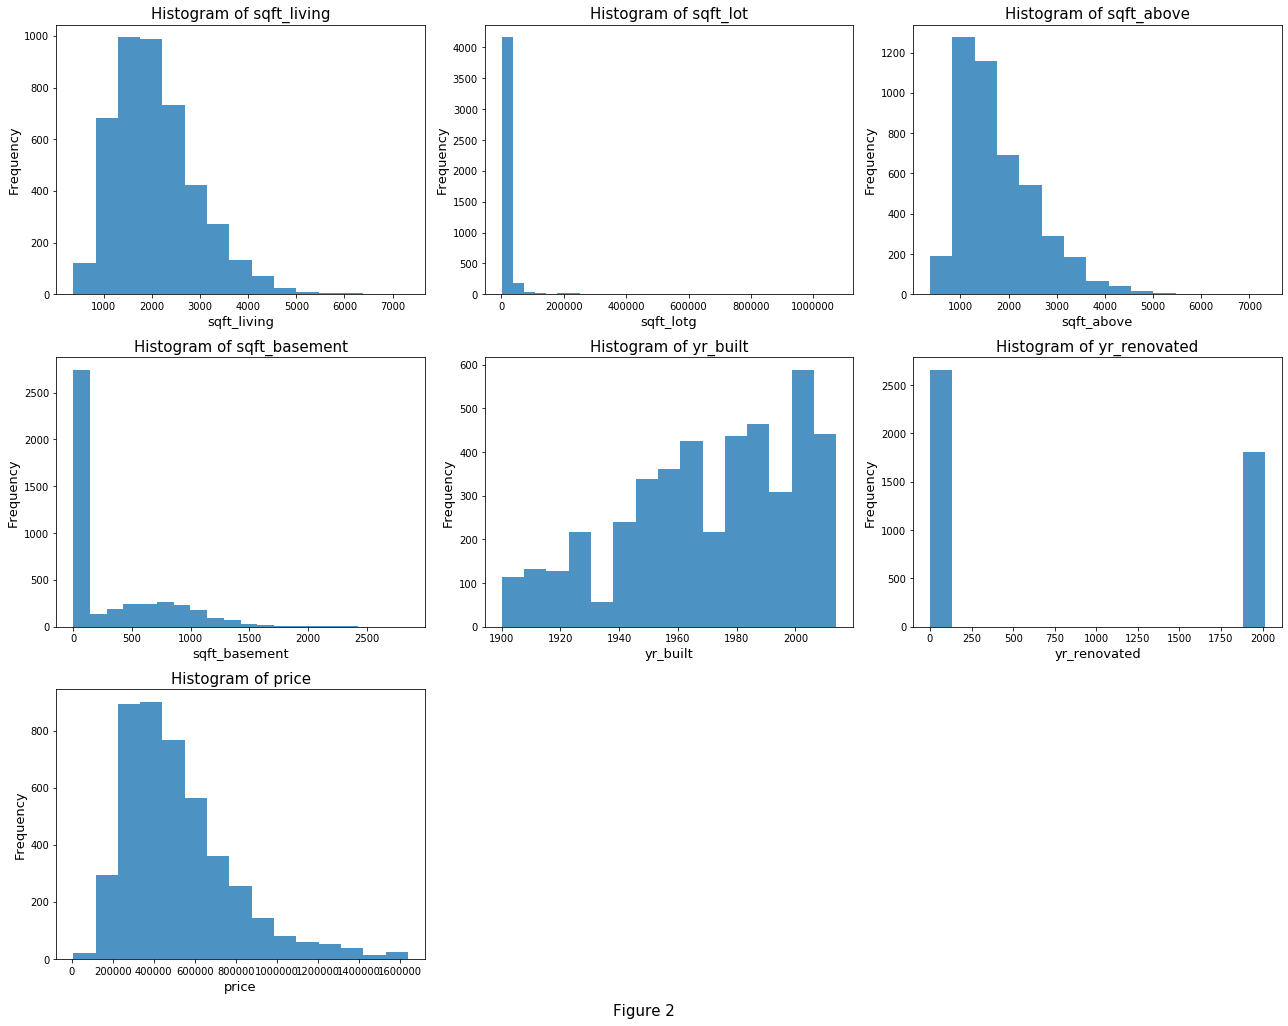

In [7]:
# Visualize the univariate distribution of continuous features, including sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, and the distribution of the target price.
plt.figure(figsize = (18, 14))
plt.subplot(3, 3, 1)
plt.hist(df['sqft_living'], bins = 15, alpha = 0.8)
plt.title('Histogram of ''sqft_living''', fontsize = 15)
plt.xlabel('sqft_living', fontsize = 13)
plt.ylabel('Frequency', fontsize = 13)

plt.subplot(3, 3, 2)
plt.hist(df['sqft_lot'], bins = 30, alpha = 0.8)
plt.title('Histogram of ''sqft_lot''', fontsize = 15)
plt.xlabel('sqft_lotg', fontsize = 13)
plt.ylabel('Frequency', fontsize = 13)

plt.subplot(3, 3, 3)
plt.hist(df['sqft_above'], bins = 15, alpha = 0.8)
plt.title('Histogram of ''sqft_above''', fontsize = 15)
plt.xlabel('sqft_above', fontsize = 13)
plt.ylabel('Frequency', fontsize = 13)

plt.subplot(3, 3, 4)
plt.hist(df['sqft_basement'], bins = 20, alpha = 0.8)
plt.title('Histogram of ''sqft_basement''', fontsize = 15)
plt.xlabel('sqft_basement', fontsize = 13)
plt.ylabel('Frequency', fontsize = 13)

plt.subplot(3, 3, 5)
plt.hist(df['yr_built'], bins = 15, alpha = 0.8)
plt.title('Histogram of ''yr_built''', fontsize = 15)
plt.xlabel('yr_built', fontsize = 13)
plt.ylabel('Frequency', fontsize = 13)

plt.subplot(3, 3, 6)
plt.hist(df['yr_renovated'], bins = 15, alpha = 0.8)
plt.title('Histogram of ''yr_renovated''', fontsize = 15)
plt.xlabel('yr_renovated', fontsize = 13)
plt.ylabel('Frequency', fontsize = 13)

plt.subplot(3, 3, 7)
plt.hist(df['price'], bins = 15, alpha = 0.8)
plt.title('Histogram of ''price''', fontsize = 15)
plt.xlabel('price', fontsize = 13)
plt.ylabel('Frequency', fontsize = 13)

plt.suptitle(t = 'Figure 2', y = 0, fontsize = 15)
plt.tight_layout()

By visualizing all the continuous features as well as the target (Figure 2), we can notice that 

1) The distributions of 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement' and 'price' are all right-skewed. Histogram of 'yr_built' is left-skewed. We can take log of our target 'price'.

2) Features 'sqft_living', 'sqft_lot', 'sqft_above' and 'sqft_basement' are on the same scale, but theirs is different with the scale of 'yr_built' and 'yr_renovated'. For Ridge Regression, it's important to scale the features before training the model.

3) 'sqft_lot' and 'sqft_basement' have a large number of zeros.

4) 'yr_renovated' has a lot zeros. After checking the data.dat file, we know that all the NaNs are ecoded as 0. So, we need to deal with these missing values.

In [8]:
# Replace 0 in column 'yr_renovated' with np.nan
df['yr_renovated'].replace(0, np.nan, inplace = True)

### 2.3 Visualize the dependency of the target on each continuous feature (2d scatter plot).

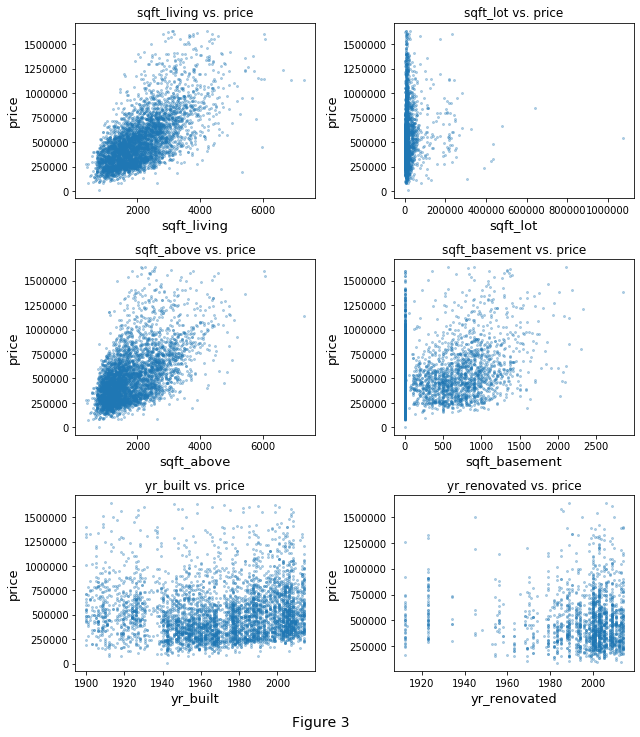

In [9]:
# Visualize the dependency of the target on each continuous feature.
plt.figure(figsize = (9, 10))
plt.subplot(3, 2, 1)
plt.scatter(df['sqft_living'], df['price'], alpha = 0.3, s = 4)
plt.title('sqft_living vs. price')
plt.xlabel('sqft_living', fontsize = 13)
plt.ylabel('price', fontsize = 13)
plt.subplot(3, 2, 2)
plt.scatter(df['sqft_lot'], df['price'], alpha = 0.3, s = 4)
plt.title('sqft_lot vs. price')
plt.xlabel('sqft_lot', fontsize = 13)
plt.ylabel('price', fontsize = 13)
plt.subplot(3, 2, 3)
plt.scatter(df['sqft_above'], df['price'], alpha = 0.3, s = 4)
plt.title('sqft_above vs. price')
plt.xlabel('sqft_above', fontsize = 13)
plt.ylabel('price', fontsize = 13)
plt.subplot(3, 2, 4)
plt.scatter(df['sqft_basement'], df['price'], alpha = 0.3, s = 4)
plt.title('sqft_basement vs. price')
plt.xlabel('sqft_basement', fontsize = 13)
plt.ylabel('price', fontsize = 13)
plt.subplot(3, 2, 5)
plt.scatter(df['yr_built'], df['price'], alpha = 0.3, s = 4)
plt.title('yr_built vs. price')
plt.xlabel('yr_built', fontsize = 13)
plt.ylabel('price', fontsize = 13)
plt.subplot(3, 2, 6)
plt.scatter(df['yr_renovated'], df['price'], alpha = 0.3, s = 4)
plt.title('yr_renovated vs. price')
plt.xlabel('yr_renovated', fontsize = 13)
plt.ylabel('price', fontsize = 13)


plt.suptitle(t = 'Figure 3', y = 0, fontsize = 14)
plt.tight_layout()

Figure 3 shows that, feature 'sqft_living' and 'sqft_above' seem positively correlated with 'price'.

### 2.4 Split data in training and test set. Do not use the test-set unless for a final evaluation in 2.5. Use ColumnTransformer and pipeline to encode categorical variables (your choice of OneHotEncoder or another one from the categorical_encoder package, or both). Impute missing values using SimpleImputer. Evaluate Linear Regression (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default parameters. Does scaling the data (within the pipeline) with StandardScaler help? Use the preprocessing that works best going forward.

#### (1) Split training set and test set.

In [10]:
columns = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'city', 'statezip']
df = df[columns]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df['price'], random_state = 123)  # Set randome_state to be 123.  

#### (2) Use ColumnTransformer and pipeline to encode categorical variables (your choice of OneHotEncoder or another one from the categorical_encoder package, or both). Impute missing values using SimpleImputer. Evaluate Linear Regression (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default parameters.

In [12]:
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, GridSearchCV
from category_encoders.target_encoder import TargetEncoder

# Specify the categorical features
categorical = [6, 7, 8, 9, 10, 11, 12, 13]
continous = [0, 1, 2, 3, 4, 5]


cat_preprocessing = make_pipeline(SimpleImputer(strategy = 'constant', fill_value = 'NA'),
                                  OneHotEncoder(handle_unknown = 'ignore'))


preprocess = make_column_transformer((cat_preprocessing, categorical), 
                                     (SimpleImputer(), continous))

# Take log of our target
log_regressor_lr = TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp)
log_regressor_rr = TransformedTargetRegressor(Ridge(), func=np.log, inverse_func=np.exp)
log_regressor_lasso = TransformedTargetRegressor(Lasso(), func=np.log, inverse_func=np.exp)
log_regressor_en = TransformedTargetRegressor(ElasticNet(), func=np.log, inverse_func=np.exp)

# Create pipeline
pipeline_LR = Pipeline([('column_transformer', preprocess), 
                        ('model', log_regressor_lr)])
pipeline_RIDGE = Pipeline([('column_transformer', preprocess), 
                           ('model', log_regressor_rr)])
pipeline_LASSO = Pipeline([('column_transformer', preprocess),
                           ('model', log_regressor_lasso)])
pipeline_EN = Pipeline([('column_transformer', preprocess), 
                        ('model', log_regressor_en)])

# Use cross_validation to train and evaluate the four models separately.
LR_mean_score = np.mean(cross_val_score(pipeline_LR, X_train, y_train, cv = 5))
RIDGE_mean_score = np.mean(cross_val_score(pipeline_RIDGE, X_train, y_train, cv = 5))
LASSO_mean_score = np.mean(cross_val_score(pipeline_LASSO, X_train, y_train, cv = 5))
EN_mean_score = np.mean(cross_val_score(pipeline_EN, X_train, y_train, cv = 5))

In [13]:
print('Without scaling:')
print('The mean test score of Linear Regression is:', LR_mean_score, '\nThe mean test score of Ridge Regression is:', RIDGE_mean_score, '\nThe mean test score of Lasso Regression is:', LASSO_mean_score, '\nThe mean test score of ElasticNet Regression is:', EN_mean_score)

Without scaling:
The mean test score of Linear Regression is: 0.7424792921122103 
The mean test score of Ridge Regression is: 0.392766296265079 
The mean test score of Lasso Regression is: 0.39009503383408384 
The mean test score of ElasticNet Regression is: 0.3927371580457816


#### (3) Does scaling the data (within the pipeline) with StandardScaler help?

In [14]:
cont_preprocessing = make_pipeline(SimpleImputer(), StandardScaler())

preprocess_1 = make_column_transformer((cat_preprocessing, categorical),
                                       (cont_preprocessing, continous))

# Create pipeline
pipeline_LR_1 = Pipeline([('column_transformer', preprocess_1), 
                          ('model', log_regressor_lr)])
pipeline_RIDGE_1 = Pipeline([('column_transformer', preprocess_1), 
                             ('model', log_regressor_rr)])
pipeline_LASSO_1 = Pipeline([('column_transformer', preprocess_1),
                             ('model', log_regressor_lasso)])
pipeline_EN_1 = Pipeline([('column_transformer', preprocess_1), 
                          ('model', log_regressor_en)])

# Use cross_validation to train and evaluate the four models separately.
LR_mean_score_1 = np.mean(cross_val_score(pipeline_LR_1, X_train, y_train, cv = 5))
RIDGE_mean_score_1 = np.mean(cross_val_score(pipeline_RIDGE_1, X_train, y_train, cv = 5))
LASSO_mean_score_1 = np.mean(cross_val_score(pipeline_LASSO_1, X_train, y_train, cv = 5))
EN_mean_score_1 = np.mean(cross_val_score(pipeline_EN_1, X_train, y_train, cv = 5))

In [15]:
print('With scaling:')
print('The mean test score of Linear Regression is:', LR_mean_score_1, '\nThe mean test score of Ridge Regression is:', RIDGE_mean_score_1, '\nThe mean test score of Lasso Regression is:', LASSO_mean_score_1, '\nThe mean test score of ElasticNet Regression is:', EN_mean_score_1)

With scaling:
The mean test score of Linear Regression is: 0.7402299465138313 
The mean test score of Ridge Regression is: 0.7479996815928283 
The mean test score of Lasso Regression is: -0.050533544333805344 
The mean test score of ElasticNet Regression is: -0.050533544333805344


The mean test score of Ridge, Lasso, ElasticNet Regression with scaling improves a lot. In the following analysis, I will use SimpleImputer, OneHotEncoder and StandardScaler to preprocess features.

### 2.5 Tune the parameters of the models using GridSearchCV. Do the results improve? Visualize the dependence of the validation score on the parameters for Ridge, Lasso and ElasticNet.

#### (1) Tune the parameters of the models using GridSearchCV. Do the results improve?

In [16]:
# Tune the parameter alpha of Ridge using GridSearchCV
pipeline_1 = Pipeline([('column_transformer', preprocess_1), 
                       ('model', log_regressor_rr)])
param_grid_RR = [{'model': [log_regressor_rr],
                  'column_transformer': [preprocess_1],
                  'model__regressor__alpha': np.logspace(-4, 1, 7)}]

grid_RR = GridSearchCV(pipeline_1, param_grid_RR, cv = 5)
grid_RR.fit(X_train, y_train)

# Save the results into a dataframe
results_1 = pd.DataFrame(grid_RR.cv_results_)  # Store the results in the form of dataframe.

In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# Tune the parameter alpha of Lasso using GridSearchCV
param_grid_LASSO = [{'model': [log_regressor_lasso],
                     'column_transformer': [preprocess_1],
                     'model__regressor__alpha': np.logspace(-9, -3, 7)}]

grid_LASSO = GridSearchCV(pipeline_1, param_grid_LASSO, cv = 5)
grid_LASSO.fit(X_train, y_train)

# Save the results into a dataframe
results_2 = pd.DataFrame(grid_LASSO.cv_results_)  # Store the results in the form of dataframe.

In [18]:
# Tune the parameter alpha and l1_ratio of ElasticNet using GridSearchCV
param_grid_EL = [{'model': [log_regressor_en],
                  'column_transformer': [preprocess_1],
                  'model__regressor__alpha': np.logspace(-6, -1, 5), 
                  'model__regressor__l1_ratio': np.logspace(-8, -0, 5)}]

grid_EL = GridSearchCV(pipeline_1, param_grid_EL, cv = 5)
grid_EL.fit(X_train, y_train)

# Save the results into a dataframe
results_3 = pd.DataFrame(grid_EL.cv_results_)  # Store the results in the form of dataframe.

In [19]:
print('The best mean test score of Ridge Regression is:', max(results_1['mean_test_score']), '\nThe best mean test score of Lasso Regression is:', max(results_2['mean_test_score']), '\nThe best mean test score of ElasticNet Regression is:', max(results_3['mean_test_score']))


The best mean test score of Ridge Regression is: 0.749056282578538 
The best mean test score of Lasso Regression is: 0.7476531783097842 
The best mean test score of ElasticNet Regression is: 0.7480879405858512


The best alpha of Ridge Regression is 1.47 and its mean test score is 0.7491; the best alpha of Lasso Regression is 0.0001 and its mean test score is 0.7477; the best alpha and l1 score of ElasticNet Regression is 0.0003 and 1.0 and its mean test score is 0.7481. The results improve a lot than the results without tuning the parameters.

#### (2) Visualize the dependence of the validation score on the parameters for Ridge, Lasso and ElasticNet.

In [20]:
# Create pivot table for the results of ElasticNet Regression
pt = pd.pivot_table(results_3, values= 'mean_test_score', index='param_model__regressor__alpha', columns='param_model__regressor__l1_ratio')

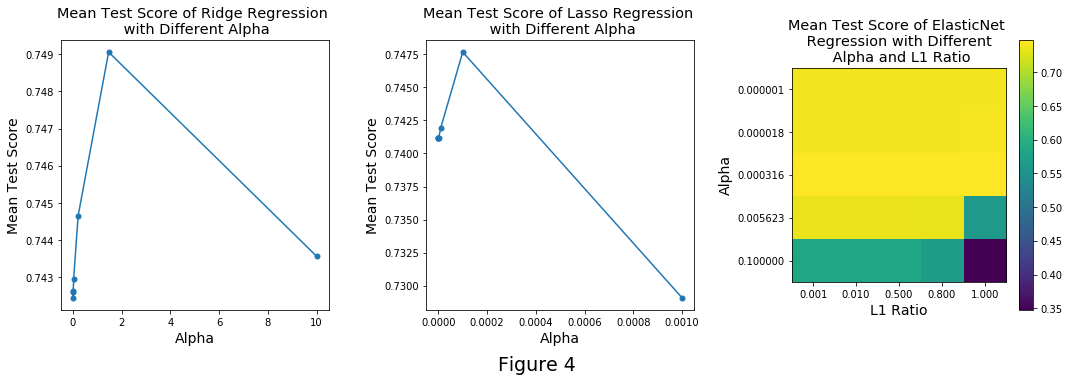

In [21]:
# Visualize the dependence of the validation score on the parameters for Ridge, Lasso and ElasticNet.
fig1, ax1 = plt.subplots(1, 3, figsize = (15, 5))
ax1[0].plot(np.logspace(-4, 1, 7), 
            np.array(results_1['mean_test_score']), marker = 'o', markersize = 5,
            label = 'Ridge Regression')
ax1[1].plot(np.logspace(-9, -3, 7), 
            np.array(results_2['mean_test_score']), marker = 'o', markersize = 5,
            label = 'Lasso Regression')


im1 = ax1[2].imshow(pt)  # default colormap
plt.colorbar(im1, ax = ax1[2])


ax1[0].set_xlabel('Alpha', 
                  fontsize = 14)
ax1[1].set_xlabel('Alpha', 
                  fontsize = 14)
ax1[2].set_xlabel('L1 Ratio', fontsize = 14)
ax1[2].set_xticklabels([0, '0.001', '0.010', '0.500', '0.800', '1.000'])
ax1[2].set_yticklabels([0, '0.000001', '0.000018', '0.000316', '0.005623', '0.100000'])


ax1[0].set_ylabel('Mean Test Score', fontsize = 14)
ax1[1].set_ylabel('Mean Test Score', fontsize = 14)
ax1[2].set_ylabel('Alpha', fontsize = 14)

ax1[0].set_title('Mean Test Score of Ridge Regression \n with Different Alpha', fontsize = 14.5)
ax1[1].set_title('Mean Test Score of Lasso Regression \n with Different Alpha', fontsize = 14.5)
ax1[2].set_title('Mean Test Score of ElasticNet \n Regression with Different \n Alpha and L1 Ratio', fontsize = 14.5)

fig1.suptitle(t = 'Figure 4', y = 0, fontsize = 19)

plt.tight_layout()

Figure 4 shows that, 

(1) with the increase of alpha, the mean test score of Ridge Regression increases to 0.7491 and then decreases.

(2) with the increase of alpha, the mean test score of Lasso Regression increases to 0.7477 and then decreases.

(3) the best mean test score of ElasticNet Regression appears when alpha is from around 0.01 and l1 ratio is around 0.80.

The best model is ElasticNet(), so we evaluate it on test set.

In [22]:
grid_EL.fit(X_train, y_train)
grid_EL.score(X_test, y_test)

0.794524340125234

### 2.6 Visualize the 20 most important coefficients of the resulting models. Do they agree on which features are important?

In [23]:
# Create column transformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Preprocess X_train
preprocess_1.fit(X_train)
X_train_preprocessed = preprocess_1.transform(X_train)

# Use the hyper-parameters that performed well in the grid-search
RR = Ridge(alpha = grid_RR.best_params_['model__regressor__alpha'])
Lasso = Lasso(alpha = grid_LASSO.best_params_['model__regressor__alpha'])
ElasticNet = ElasticNet(alpha = grid_EL.best_params_['model__regressor__alpha'], l1_ratio = grid_EL.best_params_['model__regressor__l1_ratio'])

# Train the three models on the preprocessed training data
RR.fit(X_train_preprocessed, np.log(y_train))
Lasso.fit(X_train_preprocessed, np.log(y_train))
ElasticNet.fit(X_train_preprocessed, np.log(y_train))

# Get the coefficients of the model
RR_coef = RR.coef_
Lasso_coef = Lasso.coef_
ElasticNet_coef = ElasticNet.coef_

df_RR = pd.DataFrame({'feature_index': map(str, range(RR_coef.shape[0])), 
                      'coef': RR_coef})
df_Lasso = pd.DataFrame({'feature_index': map(str, range(Lasso_coef.shape[0])), 
                         'coef': Lasso_coef})
df_ElasticNet = pd.DataFrame({'feature_index': map(str, range(ElasticNet_coef.shape[0])), 
                              'coef': ElasticNet_coef})

In [24]:
# Sort the coefficients according to their absolute values in a descending order
df_RR = df_RR.reindex(df_RR.coef.abs().sort_values(ascending = False).index)
df_Lasso = df_Lasso.reindex(df_Lasso.coef.abs().sort_values(ascending = False).index)
df_ElasticNet = df_ElasticNet.reindex(df_ElasticNet.coef.abs().sort_values(ascending = False).index)

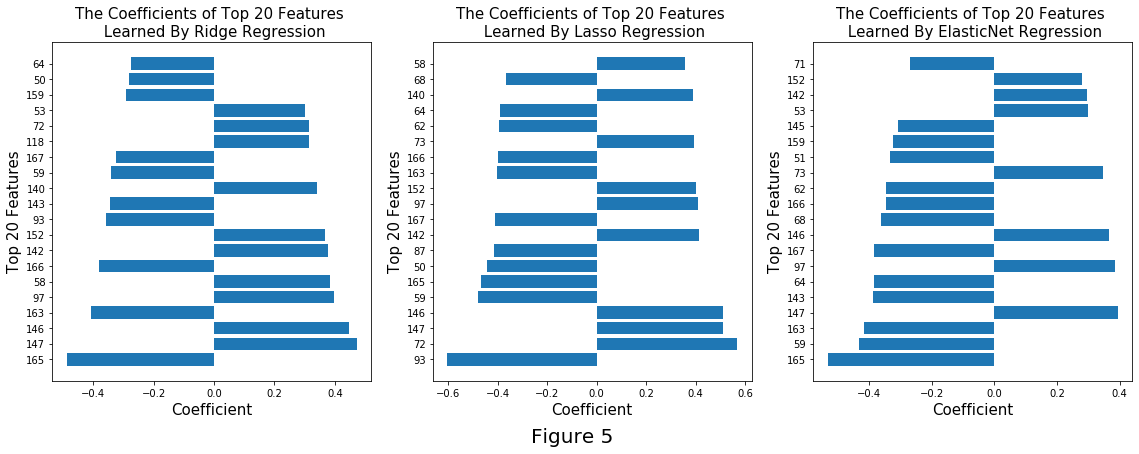

In [25]:
# Use horizontal bar chart to visualize the 20 most important coefficients for LR and LSVM
fig2, ax2 = plt.subplots(1, 3, figsize = (16, 6))
ax2[0].barh(df_RR.feature_index[0: 20], df_RR.coef[0: 20])
ax2[1].barh(df_Lasso.feature_index[0: 20], df_Lasso.coef[0: 20])
ax2[2].barh(df_ElasticNet.feature_index[0: 20], df_ElasticNet.coef[0: 20])

ax2[0].set_xlabel('Coefficient', fontsize = 15)
ax2[1].set_xlabel('Coefficient', fontsize = 15)
ax2[2].set_xlabel('Coefficient', fontsize = 15)

ax2[0].set_ylabel('Top 20 Features', fontsize = 15)
ax2[1].set_ylabel('Top 20 Features', fontsize = 15)
ax2[2].set_ylabel('Top 20 Features', fontsize = 15)

ax2[0].set_title('The Coefficients of Top 20 Features \n Learned By Ridge Regression', fontsize = 15)
ax2[1].set_title('The Coefficients of Top 20 Features \n Learned By Lasso Regression', fontsize = 15)
ax2[2].set_title('The Coefficients of Top 20 Features \n Learned By ElasticNet Regression', fontsize = 15)
fig2.suptitle(t = 'Figure 5', y = 0, fontsize = 20)

plt.tight_layout()

Figure 5 shows that the three models do not agree on which features are important.